In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# output = '210817_QCD_ttbar_4fea_sm_lr5'
output = '210817_QCD_4top_4fea_sm_lr5'
# output = '210817_ttbar_4top_4fea_sm_lr5'
# output = '210817_QCD_ttbar_4fea_2l_sm_lr5'
# output = '210817_QCD_4top_4fea_2l_sm_lr5'
# output = '210817_ttbar_4top_4fea_2l_sm_lr5'

In [3]:
# output = '210813_QCD_ttbar_4fea'
# output = '210813_QCD_4top_4fea'
# output = '210813_ttbar_4top_4fea'
# output = '210813_QCD_ttbar_4fea_2l'
# output = '210813_QCD_4top_4fea_2l'
# output = '210813_ttbar_4top_4fea_2l'

In [4]:
fPred = 'result/'+output+'/'+output+'.csv'

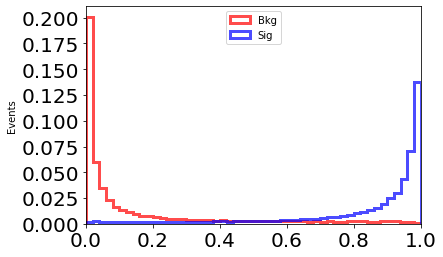

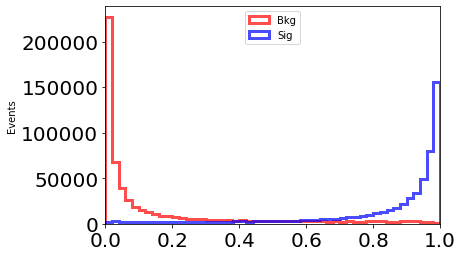

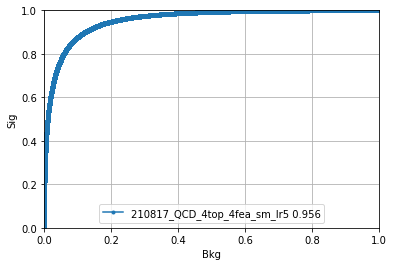

<Figure size 432x288 with 0 Axes>

In [5]:

##### Draw ROC curve #####
from sklearn.metrics import roc_curve, roc_auc_score
df = pd.read_csv(fPred)
tpr, fpr, thr = roc_curve(df['label'], df['prediction'], sample_weight=df['scaledWeight'], pos_label=0)
try:
    auc = roc_auc_score(df['label'], df['prediction'], sample_weight=df['scaledWeight'])
except:
    auc = 1

df_bkg = df[df.label==0]
df_sig = df[df.label==1]

plt.hist(df_bkg['prediction']*100, histtype='step', weights=df_bkg['scaledWeight'], density = 'True', bins=50, alpha=0.7, color='red', label='Bkg', linewidth=3)
plt.hist(df_sig['prediction']*100, histtype='step', weights=df_sig['scaledWeight'], density = 'True', bins=50, alpha=0.7, color='blue', label='Sig', linewidth=3)

plt.xticks(np.arange(0, 101, step=20),["{}".format(x*0.01) for x in np.arange(0, 101,step=20)],fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlim(0, 100)

#plt.yscale('log')
plt.ylabel('Events')
plt.legend(loc = 'upper center')
# plt.savefig('result/' + output + '/' + output + '_Events.png', dpi=300)
plt.show()
plt.clf()
################################################################
plt.hist(df_bkg['prediction']*100, histtype='step', weights=df_bkg['scaledWeight'], bins=50, alpha=0.7, color='red', label='Bkg', linewidth=3)
plt.hist(df_sig['prediction']*100, histtype='step', weights=df_sig['scaledWeight'], bins=50, alpha=0.7, color='blue', label='Sig', linewidth=3)

plt.xticks(np.arange(0, 101, step=20),["{}".format(x*0.01) for x in np.arange(0, 101,step=20)],fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlim(0, 100)


#plt.yscale('log')
plt.ylabel('Events')
plt.legend(loc = 'upper center')
# plt.savefig('result/' + output + '/' + output + '_Events.png', dpi=300)
plt.show()
plt.clf()

################################################################################

plt.plot(fpr, tpr, '.-', label='%s %.3f' % (output, auc))
plt.xlabel('Bkg')
plt.ylabel('Sig')
#plt.xlim(0, 0.001)
plt.xlim(0, 1.000)
plt.ylim(0, 1.000)
plt.legend(loc = 'lower center')
# plt.savefig('result/' +output + '/' + output + '_efficiency.png', dpi=300)
plt.grid()
plt.show()
plt.clf()

